# Manipulation_de_donnees_avec_pandas

In [1]:
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
from pandas import Series, DataFrame

Définir un objet Series comprenant la population de 5 pays puis afficher les pays ayant une population > 50’000’000.


In [4]:
ser1=Series([70,40,300,8,11],index=["France","Espagne","USA","Suisse","Tunisie"])

In [5]:
ser1

France      70
Espagne     40
USA        300
Suisse       8
Tunisie     11
dtype: int64

In [6]:
print(ser1["France"])

70


In [7]:
ser1[ser1>50]

France     70
USA       300
dtype: int64

In [8]:
#on va chercher le second élément de la série
ser1.iloc[1]

40

In [9]:
ser1.name="Populations"
ser1.index.name="Pays"
ser1

Pays
France      70
Espagne     40
USA        300
Suisse       8
Tunisie     11
Name: Populations, dtype: int64

Créez un objet Series et ajoutez des dates partant du 3 décembre 2016 par jour jusqu’à aujourd’hui.


In [10]:
dates=pd.date_range("2016-12-03","2017-04-25",freq="D")

In [11]:
ser2=Series(np.random.randn(len(dates)),index=dates)

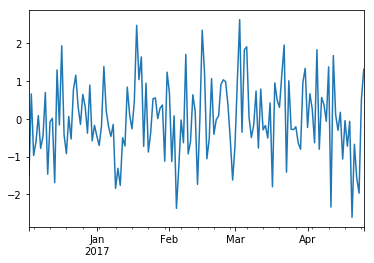

In [12]:
#on peut représenter cette série
ser2.plot()

In [13]:
#on génère des périodes par trimestre
Quarters=pd.period_range("2016-01-01","2017-04-01",freq="Q")

In [14]:
ser3=Series(np.random.randn(len(Quarters)), index=Quarters)
ser3

2016Q1   -0.612033
2016Q2   -1.151204
2016Q3   -0.252708
2016Q4    0.057191
2017Q1   -0.242710
2017Q2   -0.432901
Freq: Q-DEC, dtype: float64

### Les dataframes

In [15]:
import webbrowser
url='https://en.wikipedia.org/wiki/List_of_all-time_NBA_win-loss_records'
webbrowser.open(url)

True

In [16]:
#puis
frame_nba=pd.read_clipboard()

In [17]:
frame_nba.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 8 columns):
Rank                30 non-null int64
Team                30 non-null object
Won                 30 non-null object
Lost                30 non-null object
Pct.                30 non-null float64
First NBA Season    30 non-null object
Total Games         30 non-null object
Division            30 non-null object
dtypes: float64(1), int64(1), object(6)
memory usage: 2.0+ KB


In [18]:
frame_nba.head(3)

,Rank,Team,Won,Lost,Pct.,First NBA Season,Total Games,Division
0,1,San Antonio Spurs,"2,067","1,247",0.624,1976–77,"3,314",Southwest
1,2,Los Angeles Lakers,"3,261","2,190",0.598,1948–49,"5,451",Pacific
2,3,Boston Celtics,"3,274","2,286",0.589,1946–47,"5,560",Atlantic


In [19]:
#on transforme les données afin de corriger la problème de codage
for var in frame_nba.columns:
    if frame_nba[var].dtype==object:
        frame_nba[var]=frame_nba[var].str.replace(",","")
        try:
            frame_nba[var]=frame_nba[var].astype(float)
        except:
            pass

In [20]:
frame_nba.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 8 columns):
Rank                30 non-null int64
Team                30 non-null object
Won                 30 non-null float64
Lost                30 non-null float64
Pct.                30 non-null float64
First NBA Season    30 non-null object
Total Games         30 non-null float64
Division            30 non-null object
dtypes: float64(4), int64(1), object(3)
memory usage: 2.0+ KB


In [21]:
#on fait un tri sur deux clés de tri
frame_nba.sort_values(["Division","Won"],ascending=[True,False])

,Rank,Team,Won,Lost,Pct.,First NBA Season,Total Games,Division
2,3,Boston Celtics,3274.0,2286.0,0.589,1946–47,5560.0,Atlantic
10,11,Philadelphia 76ers,2754.0,2632.0,0.511,1949–50,5386.0,Atlantic
15,16,New York Knicks,2732.0,2825.0,0.492,1946–47,5557.0,Atlantic
27,28,Brooklyn Nets,1380.0,1934.0,0.416,1976–77,3314.0,Atlantic
24,25,Toronto Raptors,785.0,971.0,0.447,1995–96,1756.0,Atlantic
16,17,Detroit Pistons,2653.0,2797.0,0.487,1948–49,5450.0,Central
7,8,Chicago Bulls,2156.0,1977.0,0.522,1966–67,4133.0,Central
11,12,Milwaukee Bucks,2025.0,1945.0,0.510,1968–69,3970.0,Central
20,21,Cleveland Cavaliers,1779.0,2027.0,0.467,1970–71,3806.0,Central
14,15,Indiana Pacers,1648.0,1665.0,0.497,1976–77,3313.0,Central


Obtenir les différentes statistiques descriptives pour les données NBA

In [22]:
frame_nba.describe(include="all")

,Rank,Team,Won,Lost,Pct.,First NBA Season,Total Games,Division
count,30.000000,30,30.000000,30.000000,30.000000,30,30.000000,30
unique,NaN,30,NaN,NaN,NaN,15,NaN,6
top,NaN,Oklahoma City Thunder,NaN,NaN,NaN,1976–77,NaN,Southeast
freq,NaN,1,NaN,NaN,NaN,4,NaN,5
mean,15.500000,NaN,1893.966667,1884.833333,0.494300,NaN,3778.800000,NaN
std,8.803408,NaN,738.329311,632.328051,0.055334,NaN,1309.153541,NaN
min,1.000000,NaN,562.000000,652.000000,0.391000,NaN,1214.000000,NaN
25%,8.250000,NaN,1413.750000,1395.250000,0.459250,NaN,3067.750000,NaN
50%,15.500000,NaN,2028.500000,1900.000000,0.494500,NaN,3806.000000,NaN
75%,22.750000,NaN,2418.500000,2286.000000,0.521500,NaN,5172.750000,NaN


In [23]:
frame_nba.corr()

,Rank,Won,Lost,Pct.,Total Games
Rank,1.000000,-0.586385,-0.082124,-0.967006,-0.370373
Won,-0.586385,1.000000,0.823484,0.600994,0.961722
Lost,-0.082124,0.823484,1.000000,0.072293,0.947429
Pct.,-0.967006,0.600994,0.072293,1.000000,0.373863
Total Games,-0.370373,0.961722,0.947429,0.373863,1.000000


In [24]:
#on crée une variable saison
frame_nba["Season"]=frame_nba["First NBA Season"].str[0:4].astype(int)

In [25]:
frame_nba.corr()

,Rank,Won,Lost,Pct.,Total Games,Season
Rank,1.000000,-0.586385,-0.082124,-0.967006,-0.370373,0.358543
Won,-0.586385,1.000000,0.823484,0.600994,0.961722,-0.960493
Lost,-0.082124,0.823484,1.000000,0.072293,0.947429,-0.946891
Pct.,-0.967006,0.600994,0.072293,1.000000,0.373863,-0.366826
Total Games,-0.370373,0.961722,0.947429,0.373863,1.000000,-0.999047
Season,0.358543,-0.960493,-0.946891,-0.366826,-0.999047,1.000000


Importez le fichier demo_ventes.csv depuis Python dans frameVentes.


In [26]:
frame_ventes=pd.read_csv("demo_ventes.csv",sep=';',decimal=',')
frame_ventes

,account,Jan,Feb,Mar
0,211829,10000,62000,35000
1,320563,95000,45000,35000
2,648336,91000,120000,35000
3,109996,45000,120000,10000
4,121213,162000,120000,35000
5,132971,150000,120000,35000
6,145068,62000,120000,70000
7,205217,145000,95000,35000
8,209744,70000,95000,35000
9,212303,70000,120000,35000


In [27]:
#on sauve en csv
frame_nba.to_csv("nba_wiki.csv",sep=';',decimal=',')

In [28]:
#on récupère des données en html
data_bank=pd.io.html.read_html("https://www.fdic.gov/bank/individual/failed/banklist.html")

In [29]:
frame_bank=data_bank[0]

In [30]:
#on extrait les états avec le plus de fails de banques
frame_bank["ST"].value_counts()

GA    93
FL    75
IL    67
CA    41
MN    23
WA    19
AZ    16
MO    16
MI    14
NV    12
TX    12
MD    10
CO    10
PA    10
SC    10
WI    10
KS     9
UT     8
OH     8
AL     7
OK     7
TN     7
NC     7
NJ     7
OR     6
VA     5
NY     5
PR     4
AR     4
NM     3
LA     3
IN     3
NE     3
MS     2
KY     2
ID     2
CT     2
IA     2
NH     1
SD     1
WY     1
HI     1
MA     1
WV     1
Name: ST, dtype: int64

In [31]:
data_nba=pd.io.html.read_html('https://en.wikipedia.org/wiki/List_of_all-time_NBA_win-loss_records')

In [32]:
#importation de données Excel
data_excel=pd.ExcelFile("excel-data.xlsx")

In [33]:
data_excel.sheet_names

['sheet1']

In [34]:
frame_excel=data_excel.parse(data_excel.sheet_names[0])

In [35]:
frame_excel

,account,name,street,city,state,postal-code
0,211829,"Kerluke, Koepp and Hilpert",34456 Sean Highway,New Jaycob,Texas,28752
1,320563,Walter-Trantow,1311 Alvis Tunnel,Port Khadijah,NorthCarolina,38365
2,648336,"Bashirian, Kunde and Price",62184 Schamberger Underpass Apt. 231,New Lilianland,Iowa,76517
3,109996,"D'Amore, Gleichner and Bode",155 Fadel Crescent Apt. 144,Hyattburgh,Maine,46021
4,121213,Bauch-Goldner,7274 Marissa Common,Shanahanchester,California,49681
5,132971,"Williamson, Schumm and Hettinger",89403 Casimer Spring,Jeremieburgh,Arkansas,62785
6,145068,Casper LLC,340 Consuela Bridge Apt. 400,Lake Gabriellaton,Mississipi,18008
7,205217,Kovacek-Johnston,91971 Cronin Vista Suite 601,Deronville,RhodeIsland,53461
8,209744,Champlin-Morar,26739 Grant Lock,Lake Juliannton,Pennsylvania,64415
9,212303,Gerhold-Maggio,366 Maggio Grove Apt. 998,North Ras,Idaho,46308


Importez la base de données SQLite salaries et récupérez la table Salaries dans un DataFrame 


In [36]:
from sqlalchemy import create_engine

In [37]:
engine=create_engine('sqlite:///salaries.sqlite')

In [38]:
engine.table_names()

['Salaries']

In [39]:
frame_salaries=pd.read_sql_table("Salaries",engine)

In [40]:
frame_salaries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148654 entries, 0 to 148653
Data columns (total 13 columns):
Id                  148654 non-null int64
EmployeeName        148654 non-null object
JobTitle            148654 non-null object
BasePay             148654 non-null object
OvertimePay         148654 non-null object
OtherPay            148654 non-null object
Benefits            148654 non-null object
TotalPay            148654 non-null float64
TotalPayBenefits    148654 non-null float64
Year                148654 non-null int64
Notes               148654 non-null object
Agency              148654 non-null object
Status              148654 non-null object
dtypes: float64(2), int64(2), object(9)
memory usage: 14.7+ MB


In [41]:
#transformation des données
frame_salaries.sort_values("TotalPay",ascending=False)
frame_salaries["OvertimePay"].replace("",np.nan,inplace=True)
frame_salaries["OvertimePay"].replace('Not Provided',np.nan,inplace=True)
frame_salaries["OvertimePay"].astype(float)

0              0.00
1         245131.88
2         106088.18
3          56120.71
4           9737.00
5           8601.00
6          89062.90
7              0.00
8          86362.68
9              0.00
10         71344.88
11         87082.62
12             0.00
13             0.00
14         74050.30
15         73478.20
16             0.00
17        119397.26
18         69626.12
19           880.16
20             0.00
21           377.21
22         93200.58
23         77896.14
24         97868.77
25             0.00
26         40008.00
27         80706.88
28             0.00
29             0.00
            ...    
148624         0.00
148625         0.00
148626         0.00
148627         0.00
148628         0.00
148629         0.00
148630         0.00
148631         0.00
148632         0.00
148633         0.00
148634         0.00
148635         0.00
148636         0.00
148637         0.00
148638         0.00
148639         0.00
148640         0.00
148641         0.00
148642         0.00


In [42]:
frame_salaries.sort_values("OvertimePay",ascending=False)

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966,245131.88,137811,,538909.28,538909.28,2011,,San Francisco,
36159,36160,Gary Altenberg,"Lieutenant, Fire Suppression",128809,220909.48,13126.3,44430.1,362844.66,407274.78,2012,,San Francisco,
72964,72965,Whitney P Yee,Deputy Sheriff,95123,196689.18,16622.7,36125.5,308434.84,344560.33,2013,,San Francisco,
36163,36164,Frederick Binkley,EMT/Paramedic/Firefighter,126863,192424.49,17917.2,44438.2,337204.86,381643.11,2012,,San Francisco,
110574,110575,Antonio B Santiago,Deputy Sheriff,94191,173547.73,19740.8,38238.6,287479.58,325718.15,2014,,San Francisco,FT
110577,110578,Barry J Bloom,Deputy Sheriff,94191.1,173178.23,17960.1,38171.5,285329.47,323500.96,2014,,San Francisco,FT
110583,110584,Whitney P Yee,Deputy Sheriff,94191,169659.92,16813.5,38311.1,280664.38,318975.45,2014,,San Francisco,FT
72943,72944,Gary L Altenberg,"Lieutenant, Fire Suppression",135903,163477.81,20995,46030.8,320375.79,366406.55,2013,,San Francisco,
36199,36200,Scott Scholzen,Firefighter,109784,160418.47,19873.8,41230.9,290076.13,331307.02,2012,,San Francisco,
73021,73022,Barry J Bloom,Deputy Sheriff,95123.1,156077.49,17018.2,35837.9,268218.79,304056.70,2013,,San Francisco,


In [43]:
frame_salaries["JobTitle"].nunique()

2159

In [44]:
frame_salaries["JobTitle"].value_counts()

Transit Operator                                 7036
Special Nurse                                    4389
Registered Nurse                                 3736
Public Svc Aide-Public Works                     2518
Police Officer 3                                 2421
Custodian                                        2418
TRANSIT OPERATOR                                 2388
Firefighter                                      2359
Recreation Leader                                1971
Patient Care Assistant                           1945
Deputy Sheriff                                   1933
Police Officer                                   1476
SPECIAL NURSE                                    1402
Public Service Trainee                           1328
REGISTERED NURSE                                 1219
Police Officer 2                                 1141
Attorney (Civil/Criminal)                        1126
Porter                                           1095
Sergeant 3                  

In [45]:
#on groupe par emploi
salaries_group=frame_salaries.groupby("JobTitle")

In [46]:
salaries_group.mean().idxmax()

Id                                                    Not provided
OvertimePay                             Wire Rope Cable Maint Sprv
TotalPay            GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY
TotalPayBenefits                          Chief Investment Officer
Year                                   ACPO,JuvP, Juv Prob (SFERS)
dtype: object

Joindre les deux dataframes de ventes en utilisant l’id.


In [47]:
frame_merge=pd.merge(frame_excel,frame_ventes,on='account')

In [48]:
frame_merge

,account,name,street,city,state,postal-code,Jan,Feb,Mar
0,211829,"Kerluke, Koepp and Hilpert",34456 Sean Highway,New Jaycob,Texas,28752,10000,62000,35000
1,320563,Walter-Trantow,1311 Alvis Tunnel,Port Khadijah,NorthCarolina,38365,95000,45000,35000
2,648336,"Bashirian, Kunde and Price",62184 Schamberger Underpass Apt. 231,New Lilianland,Iowa,76517,91000,120000,35000
3,109996,"D'Amore, Gleichner and Bode",155 Fadel Crescent Apt. 144,Hyattburgh,Maine,46021,45000,120000,10000
4,121213,Bauch-Goldner,7274 Marissa Common,Shanahanchester,California,49681,162000,120000,35000
5,132971,"Williamson, Schumm and Hettinger",89403 Casimer Spring,Jeremieburgh,Arkansas,62785,150000,120000,35000
6,145068,Casper LLC,340 Consuela Bridge Apt. 400,Lake Gabriellaton,Mississipi,18008,62000,120000,70000
7,205217,Kovacek-Johnston,91971 Cronin Vista Suite 601,Deronville,RhodeIsland,53461,145000,95000,35000
8,209744,Champlin-Morar,26739 Grant Lock,Lake Juliannton,Pennsylvania,64415,70000,95000,35000
9,212303,Gerhold-Maggio,366 Maggio Grove Apt. 998,North Ras,Idaho,46308,70000,120000,35000


In [49]:
#on veut dicrétiser les données
pd.cut(frame_merge["Jan"],4)

0        (9848, 48000]
1      (86000, 124000]
2      (86000, 124000]
3        (9848, 48000]
4     (124000, 162000]
5     (124000, 162000]
6       (48000, 86000]
7     (124000, 162000]
8       (48000, 86000]
9       (48000, 86000]
10       (9848, 48000]
11    (124000, 162000]
12    (124000, 162000]
13      (48000, 86000]
14    (124000, 162000]
Name: Jan, dtype: category
Categories (4, object): [(9848, 48000] < (48000, 86000] < (86000, 124000] < (124000, 162000]]

In [50]:
frame_merge["Jan_cut"]=pd.cut(frame_merge["Jan"],[frame_merge["Jan"].min(),50000,100000,frame_merge["Jan"].max()],
       include_lowest=True)

In [51]:
frame_merge["Jan_qcut"]=pd.qcut(frame_merge["Jan"],3)

In [52]:
frame_merge["Jan_qcut"].value_counts()

(146666.667, 162000]       5
(67333.333, 146666.667]    5
[10000, 67333.333]         5
Name: Jan_qcut, dtype: int64

D'autres approches pour extraire les données

In [53]:
frame_salaries.eval("TotalPay <100")

0         False
1         False
2         False
3         False
4         False
5         False
6         False
7         False
8         False
9         False
10        False
11        False
12        False
13        False
14        False
15        False
16        False
17        False
18        False
19        False
20        False
21        False
22        False
23        False
24        False
25        False
26        False
27        False
28        False
29        False
          ...  
148624     True
148625     True
148626     True
148627     True
148628     True
148629     True
148630     True
148631     True
148632     True
148633     True
148634     True
148635     True
148636     True
148637     True
148638     True
148639     True
148640     True
148641     True
148642     True
148643     True
148644     True
148645     True
148646     True
148647     True
148648     True
148649     True
148650     True
148651     True
148652     True
148653     True
dtype: bool

In [54]:
frame_salaries.query("TotalPay <100 & TotalPay >50")

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
36070,36071,CLARENCE JOHNSON,PUBLIC SERVICE AIDE-SPECIAL PROGRAMS,99.1,0.0,0,,99.10,99.10,2011,,San Francisco,
36071,36072,RONALD TERASHIMA,SENIOR DEPUTY SHERIFF,0,0.0,98.1,,98.10,98.10,2011,,San Francisco,
36072,36073,LINDSAY PALAIMA,PUBLIC SERVICE TRAINEE,98,0.0,0,,98.00,98.00,2011,,San Francisco,
36073,36074,FIAMMA GIGER,PUBLIC SERVICE TRAINEE,98,0.0,0,,98.00,98.00,2011,,San Francisco,
36074,36075,CHERI COLLINS,PSYCHIATRIC TECHNICIAN,0,0.0,97.73,,97.73,97.73,2011,,San Francisco,
36075,36076,RUBEN HERNANDEZ JR,GENERAL LABORER,93.8,0.0,0,,93.80,93.80,2011,,San Francisco,
36076,36077,DEBRA TANIS,FIRE RESCUE PARAMEDIC,0,0.0,92.21,,92.21,92.21,2011,,San Francisco,
36077,36078,JOCELYN MADAMBA,SPECIAL NURSE,76.33,0.0,15.27,,91.60,91.60,2011,,San Francisco,
36078,36079,HARRY GOTWETTER,TRANSIT OPERATOR,0,0.0,88.26,,88.26,88.26,2011,,San Francisco,
36079,36080,MARIANNA BALQUIEDRA,"REPRESENTATIVE, HUMAN RIGHTS COMMISSION",0,0.0,87.64,,87.64,87.64,2011,,San Francisco,
